In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

##### Функция построения графиков

In [0]:
def GraphBuilder(ArrX,ArrY,Title,LabelX,LabelY):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    plt.plot(ArrX, ArrY)
    plt.grid(True)
    plt.title(Title, fontsize=16)
    plt.ylabel(LabelY, fontsize=12)
    plt.xlabel(LabelX, fontsize=12)
    plt.show()

##### Функция решётчатого поиска с перекрёстной проверкой

In [0]:
def RegGridSearchCV(model, NEstimatorsTP, dataParam, dataAnsw):
    MAEList = []
    MSEList = []
    R2SList = []
    for param in NEstimatorsTP:
        ModelGS = model(n_estimators=param, random_state = 0)
        MAEList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='neg_mean_absolute_error').mean()))
        MSEList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='neg_mean_squared_error').mean()))
        R2SList.append(abs(cross_val_score(ModelGS, dataParam, dataAnsw, cv =10, scoring='r2').mean()))
    return MAEList, MSEList, R2SList

In [7]:
url ='https://raw.githubusercontent.com/NastjaK666/uni/master/Admission_Predict.csv'
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
DataParam = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
DataAnsw = data['Chance of Admit']
data.shape

KeyError: ignored

In [0]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [0]:
TrainX,TestX,TrainY,TestY = train_test_split(DataParam,DataAnsw, test_size=0.3, random_state = 1)

NameError: ignored

## Случайный лес.

In [0]:
RandForest5 = RandomForestRegressor(n_estimators=5)
RandForest5.fit(TrainX,TrainY)
RFPredict5 = RandForest5.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, RFPredict5),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, RFPredict5),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, RFPredict5),6))

NameError: ignored

In [0]:
RFNEstimatorsTP = range(1,101)
RFMAEList,RFMSEList,RFR2SList = RegGridSearchCV(RandomForestRegressor,RFNEstimatorsTP,DataParam,DataAnsw)

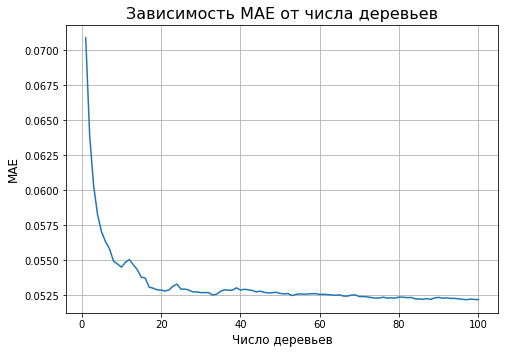

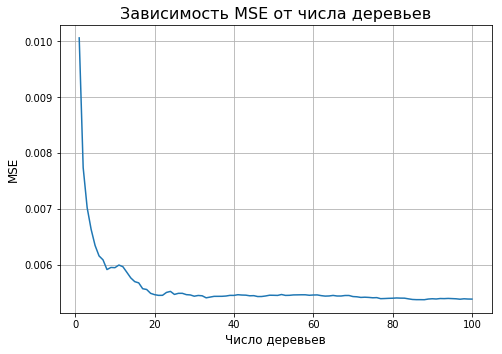

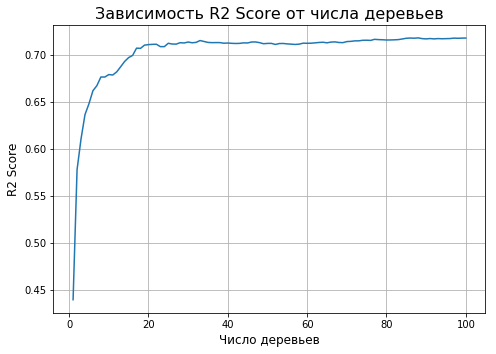

In [0]:
GraphBuilder(RFNEstimatorsTP, RFMAEList,'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(RFNEstimatorsTP, RFMSEList,'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(RFNEstimatorsTP, RFR2SList,'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

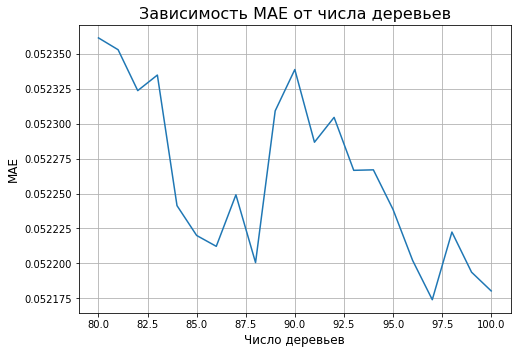

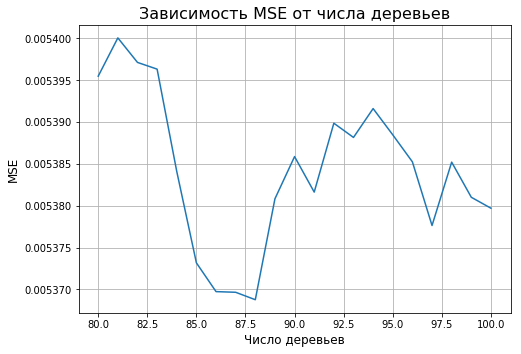

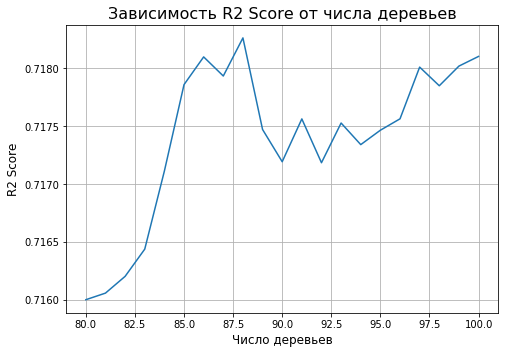

In [0]:
GraphBuilder(NEstimatorsTP[79:100], RFMAEList[79:100],'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(NEstimatorsTP[79:100], RFMSEList[79:100],'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(NEstimatorsTP[79:100], RFR2SList[79:100],'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

In [0]:
RandForestBP = RandomForestRegressor(n_estimators=88)
RandForestBP.fit(TrainX,TrainY)
RFPredictBP = RandForestBP.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, RFPredictBP),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, RFPredictBP),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, RFPredictBP),6))

Средняя абсолютная ошибка:	 0.04869
Средняя квадратичная ошибка:	 0.004916
Коэффициент детерминации:	 0.784573


## Градиентный бустинг.

In [0]:
GradBoost5 = GradientBoostingRegressor(n_estimators=20)
GradBoost5.fit(TrainX,TrainY)
GBPredict5 = GradBoost5.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, GBPredict5),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, GBPredict5),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, GBPredict5),6))

Средняя абсолютная ошибка:	 0.054252
Средняя квадратичная ошибка:	 0.005557
Коэффициент детерминации:	 0.756521


In [0]:
GBNEstimatorsTP = range(1,101)
GBMAEList,GBMSEList,GBR2SList = RegGridSearchCV(GradientBoostingRegressor,RFNEstimatorsTP,DataParam,DataAnsw)

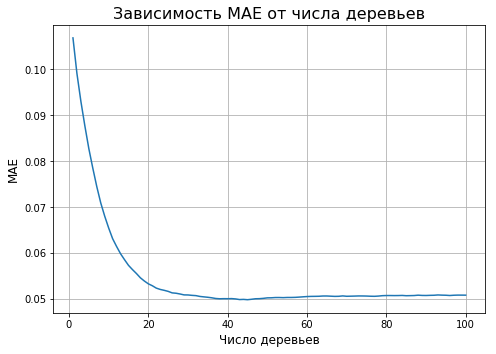

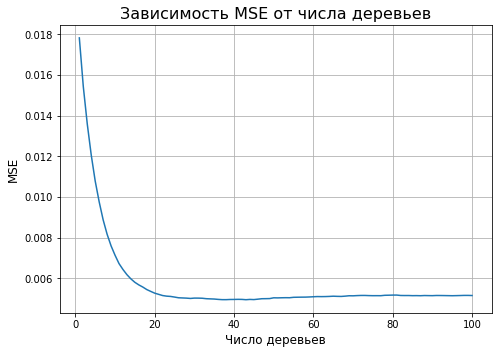

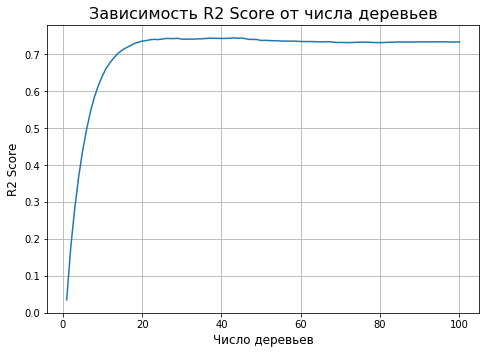

In [0]:
GraphBuilder(GBNEstimatorsTP, GBMAEList,'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(GBNEstimatorsTP, GBMSEList,'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(GBNEstimatorsTP, GBR2SList,'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

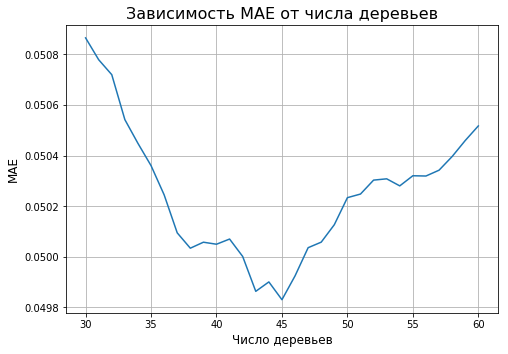

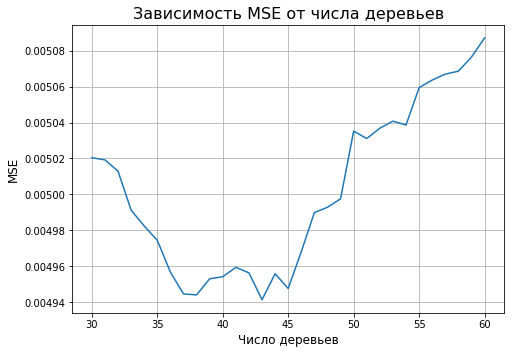

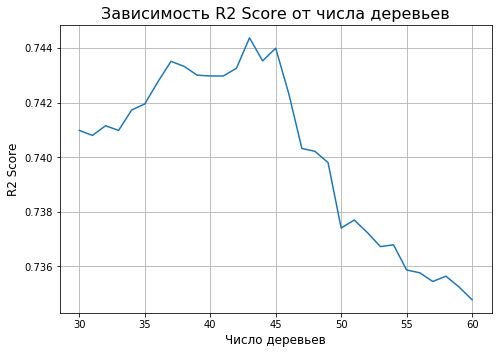

In [0]:
GraphBuilder(GBNEstimatorsTP[29:60], GBMAEList[29:60],'Зависимость MAE от числа деревьев','Число деревьев','MAE')
GraphBuilder(GBNEstimatorsTP[29:60], GBMSEList[29:60],'Зависимость MSE от числа деревьев','Число деревьев','MSE')
GraphBuilder(GBNEstimatorsTP[29:60], GBR2SList[29:60],'Зависимость R2 Score от числа деревьев','Число деревьев','R2 Score')

In [0]:
GradBoostBP = GradientBoostingRegressor(n_estimators=43)
GradBoostBP.fit(TrainX,TrainY)
GBPredictBP = GradBoostBP.predict(TestX)
print("Средняя абсолютная ошибка:\t",round(mean_absolute_error(TestY, GBPredictBP),6))
print("Средняя квадратичная ошибка:\t",round(mean_squared_error(TestY, GBPredictBP),6))
print("Коэффициент детерминации:\t",round(r2_score(TestY, GBPredictBP),6))

Средняя абсолютная ошибка:	 0.04971
Средняя квадратичная ошибка:	 0.004781
Коэффициент детерминации:	 0.790485
